In [3]:
import re
import os
import pandas as pd
import numpy as np

In [4]:
files = []
for file in os.listdir("results/walk_len"):
        print(file)
        files.append(file)

matches = [re.match("(.*)_(.*)_avg_(.*)_(.*).txt", file) for file in files]

# emb_dim = [float(match.group(1)) for match in matches]
dataset = [match.group(1) for match in matches]
method = [match.group(2) for match in matches]
# emb_dim = [match.group(3) for match in matches]
walk_lens = [float(match.group(4)) for match in matches]

20NG_deepWalk_avg_128_4.txt
20NG_deepWalk_avg_128_128.txt
webkb_deepWalk_avg_128_32.txt
webkb_deepWalk_avg_128_64.txt
webkb_deepWalk_avg_128_256.txt
20NG_deepWalk_avg_128_8.txt
webkb_deepWalk_avg_128_8.txt
20NG_deepWalk_avg_128_64.txt
webkb_deepWalk_avg_128_128.txt
webkb_deepWalk_avg_128_2.txt
webkb_deepWalk_avg_128_80.txt
20NG_deepWalk_avg_128_256.txt
20NG_deepWalk_avg_128_32.txt
webkb_deepWalk_avg_128_4.txt
20NG_deepWalk_avg_128_16.txt
webkb_deepWalk_avg_128_16.txt
20NG_deepWalk_avg_128_80.txt
20NG_deepWalk_avg_128_2.txt


In [5]:
pattern = r"Accuracy in testing set:(.*)\nMacro test:\(.*, .*, (.*), None\)\nMicro test:\(.*, .*, (.*), None\)"
pattern1 = r"Features shape:\(.*, (.*)\)"
matches = []
matches1 = []
for file in files:
    with open("results/walk_len/"+file, 'r') as f:
        s = f.read()
        matches.append(re.search(pattern, s))
        matches1.append(re.search(pattern1, s))
                        
# we need to make sure that all matches and thus match!=None
acc = [float(match.group(1)) for match in matches]
macro_f1 = [float(match.group(2)) for match in matches]
micro_f1 = [float(match.group(3)) for match in matches]
emb_dim = [int(match.group(1)) for match in matches1]

In [6]:
pattern = r"Accuracy in training set:(.*)\nMacro:\(.*, .*, (.*), None\)\nMicro:\(.*, .*, (.*), None\)"

matches = []
for file in files:
    with open("results/walk_len/"+file, 'r') as f:
        matches.append(re.search(pattern, f.read()))
train_acc = [float(match.group(1)) for match in matches]
train_macro_f1 = [float(match.group(2)) for match in matches]
train_micro_f1 = [float(match.group(3)) for match in matches]

In [7]:
d = {"dataset": dataset, "method":method, "emb_dim": emb_dim, "walk_lens": walk_lens, "acc":acc, "macro_f1":macro_f1, "micro_f1":micro_f1, "train_acc":train_acc, "train_macro_f1":train_macro_f1, "train_micro_f1":train_micro_f1}
df = pd.DataFrame(d)
df

,acc,dataset,emb_dim,macro_f1,method,micro_f1,train_acc,train_macro_f1,train_micro_f1,walk_lens
0,0.654843,20NG,128,0.633180,deepWalk,0.654843,0.737891,0.721275,0.737891,4.0
1,0.753022,20NG,128,0.737592,deepWalk,0.753022,0.821925,0.809449,0.821925,128.0
2,0.852436,webkb,128,0.831174,deepWalk,0.852436,0.873350,0.856219,0.873350,32.0
3,0.833095,webkb,128,0.813596,deepWalk,0.833095,0.891188,0.881404,0.891188,64.0
4,0.849570,webkb,128,0.831178,deepWalk,0.849570,0.878345,0.868805,0.878345,256.0
5,0.714760,20NG,128,0.695584,deepWalk,0.714760,0.785265,0.771593,0.785265,8.0
6,0.837393,webkb,128,0.818986,deepWalk,0.837393,0.862290,0.846932,0.862290,8.0
7,0.751295,20NG,128,0.733843,deepWalk,0.751295,0.822102,0.808436,0.822102,64.0
8,0.847421,webkb,128,0.832924,deepWalk,0.847421,0.887620,0.879503,0.887620,128.0
9,0.679799,webkb,128,0.619494,deepWalk,0.679799,0.690689,0.628209,0.690689,2.0


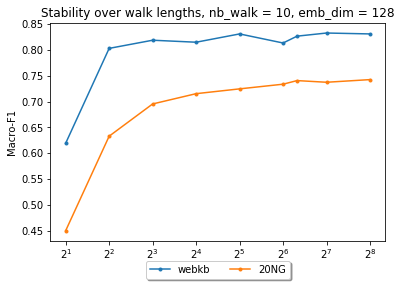

In [12]:
import matplotlib.pyplot as plt
datasets = ['webkb', '20NG']
for dataset in datasets:
    series = df[df.dataset==dataset].sort_values(by=['walk_lens'])
#     print(series)
    plt.plot(series.walk_lens,series.macro_f1,'.-', label=dataset)
# plt.rc('font', family='serif')
# plt.rc('xtick', labelsize='x-small')
# plt.rc('ytick', labelsize='x-small')
plt.title("Stability over walk lengths, nb_walk = 10, emb_dim = 128")
plt.ylabel('Macro-F1')
plt.xlabel('embedding dimension')
plt.xscale("log",basex=2)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.07),shadow=True, ncol=3)
plt.savefig('walk_length_webkb_20NG.png', dpi=300)
plt.show()